In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

ecommerce_data = pd.read_csv('../dataset/online_retail.csv')

print(ecommerce_data.shape)

ecommerce_data.head()

ecommerce_data.info()

ecommerce_data.describe()



(541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [2]:
ecommerce_data_devoluciones = ecommerce_data[ecommerce_data['InvoiceNo'].str.startswith('C')]


# PREPARACION 

eliminacion de valores nulos

In [3]:
# borrar los registros con valores nulos 
ecommerce_data = ecommerce_data.dropna()


elimiar las cantidades negativas y precios negativos 

In [4]:
# eliminar las filas con cantidades negativas y precios negativos 
ecommerce_data = ecommerce_data[ecommerce_data['Quantity'] > 0]
ecommerce_data = ecommerce_data[ecommerce_data['UnitPrice'] > 0]

ecommerce_data.info()



<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


eliminacion de registros duplicados

In [5]:
duplicados_exactos = ecommerce_data[ecommerce_data.duplicated(keep=False)]  # keep=False muestra todas las repeticiones, incluidas las primeras

# Mostrar cantidad de duplicados exactos
print(f"Número de filas duplicadas exactas: {duplicados_exactos.shape[0]}")

# Mostrar los duplicados (opcional: ordenarlos para verlos juntos)
print(duplicados_exactos.sort_values(by=list(ecommerce_data.columns)).head(20))

Número de filas duplicadas exactas: 10001
    InvoiceNo StockCode                          Description  Quantity  \
494    536409     21866          UNION JACK FLAG LUGGAGE TAG         1   
517    536409     21866          UNION JACK FLAG LUGGAGE TAG         1   
485    536409     22111         SCOTTIE DOG HOT WATER BOTTLE         1   
539    536409     22111         SCOTTIE DOG HOT WATER BOTTLE         1   
489    536409     22866        HAND WARMER SCOTTY DOG DESIGN         1   
527    536409     22866        HAND WARMER SCOTTY DOG DESIGN         1   
521    536409     22900      SET 2 TEA TOWELS I LOVE LONDON          1   
537    536409     22900      SET 2 TEA TOWELS I LOVE LONDON          1   
578    536412     21448            12 DAISY PEGS IN WOOD BOX         1   
598    536412     21448            12 DAISY PEGS IN WOOD BOX         1   
565    536412     21448            12 DAISY PEGS IN WOOD BOX         2   
601    536412     21448            12 DAISY PEGS IN WOOD BOX         2

In [6]:
ecommerce_data = ecommerce_data.drop_duplicates()


In [7]:
ecommerce_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


normalizar nombre de columnas

In [8]:
ecommerce_data.rename(columns={
    'InvoiceNo': 'id_factura',
    'StockCode': 'id_producto',
    'Description': 'descripcion',
    'Quantity': 'cantidad',
    'InvoiceDate': 'fecha_factura',
    'UnitPrice': 'precio_unitario',
    'CustomerID': 'id_cliente',
    'Country': 'pais'
}, inplace=True)


In [9]:
ecommerce_data = ecommerce_data.reset_index(drop=True)

In [10]:
ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id_factura       392692 non-null  object 
 1   id_producto      392692 non-null  object 
 2   descripcion      392692 non-null  object 
 3   cantidad         392692 non-null  int64  
 4   fecha_factura    392692 non-null  object 
 5   precio_unitario  392692 non-null  float64
 6   id_cliente       392692 non-null  float64
 7   pais             392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.0+ MB


# Analisis descriptivo

In [11]:
ecommerce_data.head(10)

,id_factura,id_producto,descripcion,cantidad,fecha_factura,precio_unitario,id_cliente,pais
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


**TOP 5 PAISES CON MAS FACTURAS EMITIDAS**

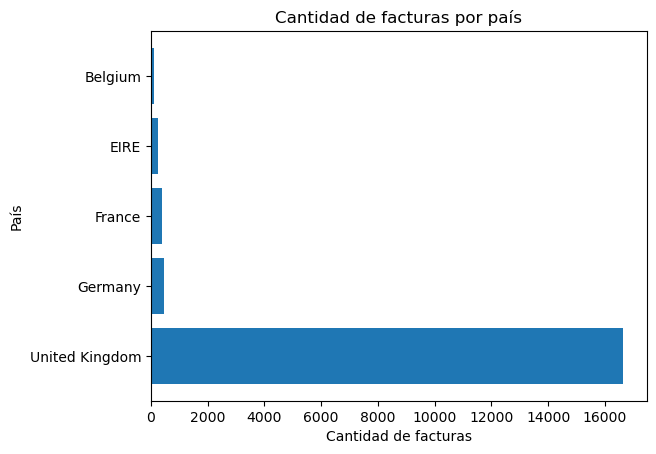

,pais,cantidadFacturas,porcentaje
35,United Kingdom,16646,0.898230
14,Germany,457,0.024660
13,France,389,0.020991
10,EIRE,260,0.014030
3,Belgium,98,0.005288


In [12]:
# numeros de facturas por cada pais 
facturas_por_pais = ecommerce_data.groupby('pais')['id_factura'].nunique().reset_index()

facturas_por_pais.columns = ['pais','cantidadFacturas']

# ordenamos por cantidad
facturas_por_pais = facturas_por_pais.sort_values(by='cantidadFacturas', ascending=False) .head(5) 

fig , ax = plt.subplots()

ax.barh(facturas_por_pais['pais'], facturas_por_pais['cantidadFacturas'])

ax.set_title('Cantidad de facturas por país')
ax.set_xlabel('Cantidad de facturas')
ax.set_ylabel('País')
plt.show()


# PORCENTAJE DE FACTURAS POR PAIS
total_facturas = ecommerce_data['id_factura'].nunique()

facturas_por_pais['porcentaje'] = facturas_por_pais['cantidadFacturas'] / total_facturas

facturas_por_pais








se puede observar que que el 90% de las facturas emitidas son de los cliente del pais `United Kingdow`

**TOP 5 cantidad de dinero ingresado por pais**

              pais        monto
35  United Kingdom  7285024.644
23     Netherlands   285446.340
10            EIRE   265262.460
14         Germany   228678.400
13          France   208934.310


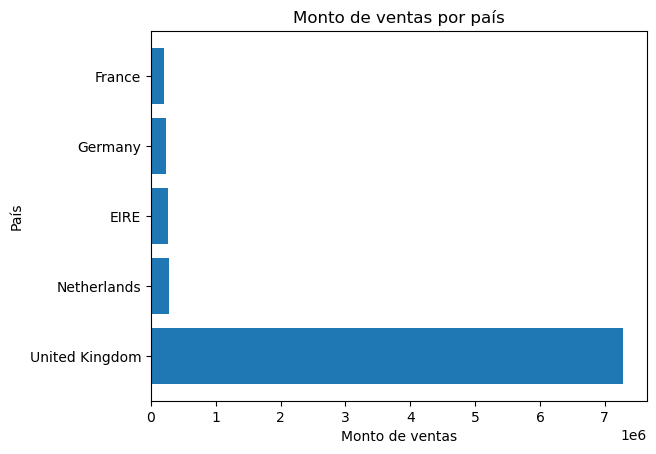

In [13]:
ecommerce_data['monto'] = ecommerce_data['cantidad'] * ecommerce_data['precio_unitario']

monto_por_pais = (
    ecommerce_data.groupby('pais')['monto']
    .sum()
    .reset_index()
    .sort_values(by='monto', ascending=False)  # ordenás de mayor a menor
    .head(5)  # y luego tomás los 5 más altos
)

print(monto_por_pais)

fig, ax = plt.subplots()

ax.barh(monto_por_pais['pais'], monto_por_pais['monto'])

ax.set_title('Monto de ventas por país')
ax.set_xlabel('Monto de ventas')
ax.set_ylabel('País')
plt.show()

monto_total = monto_por_pais['monto'].sum()
monto_por_pais['porcentaje'] = monto_por_pais['monto'] / monto_total



In [14]:
monto_por_pais

,pais,monto,porcentaje
35,United Kingdom,7285024.644,0.880542
23,Netherlands,285446.340,0.034502
10,EIRE,265262.460,0.032062
14,Germany,228678.400,0.027640
13,France,208934.310,0.025254


**TOP 10 PRODUCTOS MAS VENDIDOS POR PAIS**

In [15]:
productos_por_pais = ecommerce_data.groupby(['pais', 'id_producto'])['cantidad'].sum().reset_index()

# Para cada país, encontramos el índice del producto con mayor cantidad
idx_max = productos_por_pais.groupby('pais')['cantidad'].idxmax()

# Seleccionamos esas filas
producto_mas_vendido_por_pais = productos_por_pais.loc[idx_max].reset_index(drop=True)

producto_mas_vendido_por_pais = producto_mas_vendido_por_pais.sort_values(by='cantidad', ascending=False).reset_index(drop=True)

# Crear tabla única de productos con sus descripciones
productos_unicos = ecommerce_data[['id_producto', 'descripcion']].drop_duplicates()

# Unir al DataFrame de productos más vendidos por país
producto_mas_vendido_por_pais = producto_mas_vendido_por_pais.merge(productos_unicos, on='id_producto', how='left')

producto_mas_vendido_por_pais.head(10)

,pais,id_producto,cantidad,descripcion
0,United Kingdom,23843,80995,"PAPER CRAFT , LITTLE BIRDIE"
1,Netherlands,23084,4801,RABBIT NIGHT LIGHT
2,France,23084,4000,RABBIT NIGHT LIGHT
3,Japan,23084,3408,RABBIT NIGHT LIGHT
4,Australia,22492,2952,MINI PAINT SET VINTAGE
5,Sweden,22492,2916,MINI PAINT SET VINTAGE
6,EIRE,22197,1828,SMALL POPCORN HOLDER
7,EIRE,22197,1828,POPCORN HOLDER
8,Germany,22326,1221,ROUND SNACK BOXES SET OF4 WOODLAND
9,Spain,84997D,1089,PINK 3 PIECE POLKADOT CUTLERY SET


In [16]:
ecommerce_data.head(10)

,id_factura,id_producto,descripcion,cantidad,fecha_factura,precio_unitario,id_cliente,pais,monto
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,54.08


DESCOMPOSICION DEL CAMPO FECHA

In [17]:
# descomposicion del campo fecha_factura en dia, mes, año y hora , minuto
ecommerce_data['fecha_factura'] = pd.to_datetime(ecommerce_data['fecha_factura'])

ecommerce_data['dia'] = ecommerce_data['fecha_factura'].dt.day
ecommerce_data['mes'] = ecommerce_data['fecha_factura'].dt.month
ecommerce_data['anio'] = ecommerce_data['fecha_factura'].dt.year
ecommerce_data['horario'] = ecommerce_data['fecha_factura'].dt.time
ecommerce_data.head(10)

,id_factura,id_producto,descripcion,cantidad,fecha_factura,precio_unitario,id_cliente,pais,monto,dia,mes,anio,horario
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,1,12,2010,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1,12,2010,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,2010,08:26:00
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,1,12,2010,08:26:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,1,12,2010,08:26:00
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,1,12,2010,08:28:00
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,1,12,2010,08:28:00
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,1,12,2010,08:34:00


In [18]:
ecommerce_data = ecommerce_data.drop(columns=['fecha_factura'])

In [19]:
# numero total de facturas unicas en todo el dataset
total_facturas = ecommerce_data['id_factura'].nunique()

print(f"Total de facturas únicas en el dataset: {total_facturas}")




Total de facturas únicas en el dataset: 18532


**CANTIDAD DE FACTURAS POR MES**

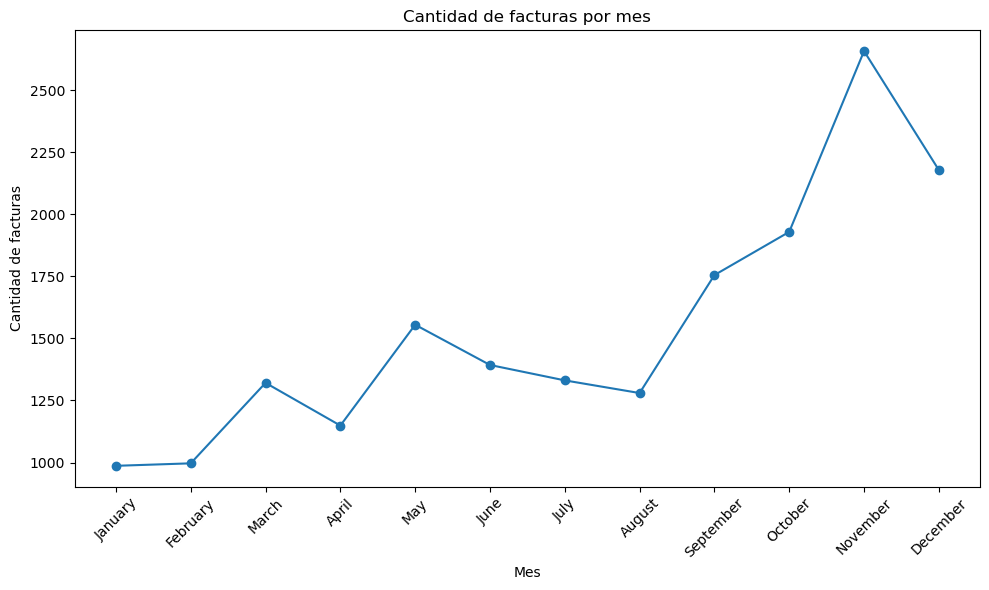

,mes,cantidad_facturas
0,1,987
1,2,997
2,3,1321
3,4,1149
4,5,1555
5,6,1393
6,7,1331
7,8,1280
8,9,1755
9,10,1929


In [20]:
import matplotlib.pyplot as plt
import calendar

# Agrupar por mes y contar facturas únicas
facturas_por_mes = ecommerce_data.groupby('mes')['id_factura'].nunique().reset_index()

# Renombrar columnas
facturas_por_mes.columns = ['mes', 'cantidad_facturas']

# Ordenar por mes (1 a 12)
facturas_por_mes = facturas_por_mes.sort_values(by='mes')

# Crear gráfico
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(facturas_por_mes['mes'], facturas_por_mes['cantidad_facturas'], marker='o')

# Poner nombres de meses en el eje X
meses_nombres = [calendar.month_name[m] for m in facturas_por_mes['mes']]
ax.set_xticks(facturas_por_mes['mes'])
ax.set_xticklabels(meses_nombres, rotation=45)

ax.set_title('Cantidad de facturas por mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de facturas')

plt.tight_layout()
plt.show()

facturas_por_mes



In [21]:
cantidad_de_clientes = ecommerce_data['id_cliente'].nunique()

print(f"Cantidad de clientes únicos en el dataset: {cantidad_de_clientes}")


# cliente que mas facturas tiene
cliente_mas_facturas = ecommerce_data.groupby('id_cliente')['id_factura'].nunique().reset_index()

cliente_mas_facturas.columns = ['id_cliente', 'cantidad_facturas']

cliente_mas_facturas = cliente_mas_facturas.sort_values(by='cantidad_facturas', ascending=False)

clientes_pais = ecommerce_data[['id_cliente', 'pais']].drop_duplicates()

cliente_mas_facturas = cliente_mas_facturas.merge(clientes_pais, on='id_cliente', how='left')

cliente_mas_facturas['porcentaje'] = cliente_mas_facturas['cantidad_facturas'] / total_facturas

cliente_mas_facturas.head(6)



Cantidad de clientes únicos en el dataset: 4338


,id_cliente,cantidad_facturas,pais,porcentaje
0,12748.0,209,United Kingdom,0.011278
1,14911.0,201,EIRE,0.010846
2,17841.0,124,United Kingdom,0.006691
3,13089.0,97,United Kingdom,0.005234
4,14606.0,93,United Kingdom,0.005018
5,15311.0,91,United Kingdom,0.004910


In [22]:
ecommerce_data.head(10)

,id_factura,id_producto,descripcion,cantidad,precio_unitario,id_cliente,pais,monto,dia,mes,anio,horario
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,1,12,2010,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,1,12,2010,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,1,12,2010,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,1,12,2010,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,1,12,2010,08:26:00
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,17850.0,United Kingdom,15.30,1,12,2010,08:26:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,17850.0,United Kingdom,25.50,1,12,2010,08:26:00
7,536366,22633,HAND WARMER UNION JACK,6,1.85,17850.0,United Kingdom,11.10,1,12,2010,08:28:00
8,536366,22632,HAND WARMER RED POLKA DOT,6,1.85,17850.0,United Kingdom,11.10,1,12,2010,08:28:00
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,13047.0,United Kingdom,54.08,1,12,2010,08:34:00


Insights extraidos a partir del EDA 


1. `TOP PAISES EN NUMERO DE FACTURAS`: Reino unido lidera en el numero de facturas emitadas con un 90% de total de facturas sin embargo, en paises como Alemania(2%), Francia(2%) , EIRE (1%) y Belgica(0.5%) se llevan un no tan grande pero significativo porcentaje del total de facturas emitidas, esto nos advierte que son potenciales clientes ademas  de reino unido.

2. `TOP INGRESOS POR PAISES`: Nuevamente Reino Unido Lidera en el ingreso por pais con un 88% del total de los ingresos, sin embargo, en paises como  Netherlands (3.45%) , EIRE(3.2%) , Alemania (2.7%)y Francia (2.5%) , un sigficativo porcentaje para el mercado extranjero, cabe reslatar que `Netherlands` no esta en el top 5 de  las facturas emitidas, pero los datos dicen que es el pais extranjero que mas gasta, puede ser porque se llevan los productos mas caros o llevan mucha cantidad o ambas cosas se debera hacer un analisis de diagnostico y compararlo con los otros paises. 


3. `Estacionalidad`: se puede observar que en los meses `marzo` , `mayo` y `noviembre` hay un gran crecimiente en las facturas emitidas y eso se deriva a demanda de productos, hacer un analisis de diagnostico para determinar porque sucede eso.


4. `dos clientes potenciales`: tenemos dos clientes 12748 y 14911 que se llevan un 1% cada uno del total de facturas emitidas



In [23]:
# contar la cantidad de clientes que hay 
cantidad_de_clientes

4338

In [24]:
cantidad_de_clientes_de_reino_unido = ecommerce_data[ecommerce_data['pais'] == 'United Kingdom']['id_cliente'].nunique()

print(f"Cantidad de clientes de Reino Unido: {cantidad_de_clientes_de_reino_unido}")

Cantidad de clientes de Reino Unido: 3920


## LIEMPIEZA DE OUTLIERS

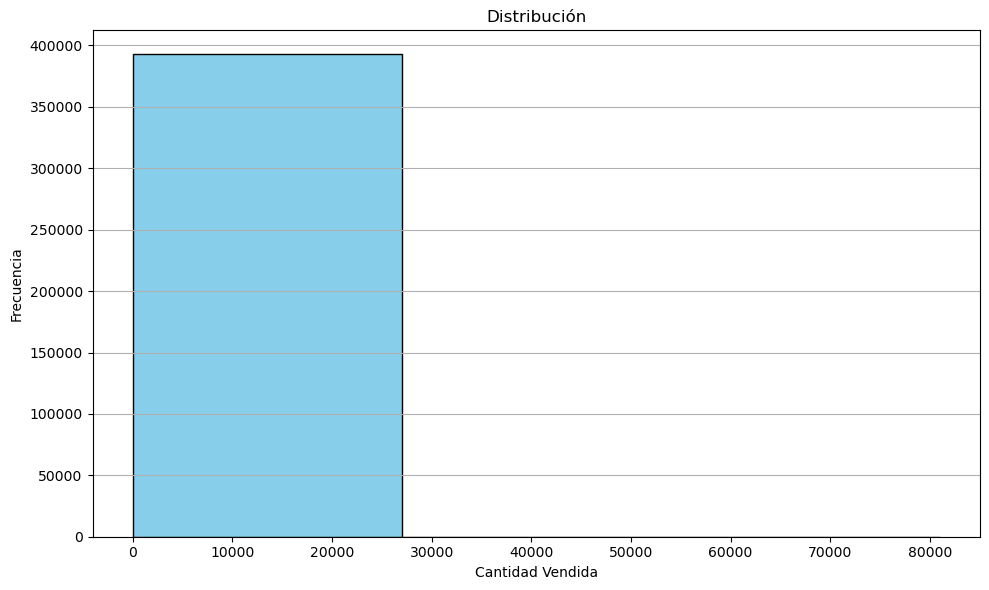

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(ecommerce_data['cantidad'], color='skyblue',bins=3, edgecolor='black')  
plt.title('Distribución')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

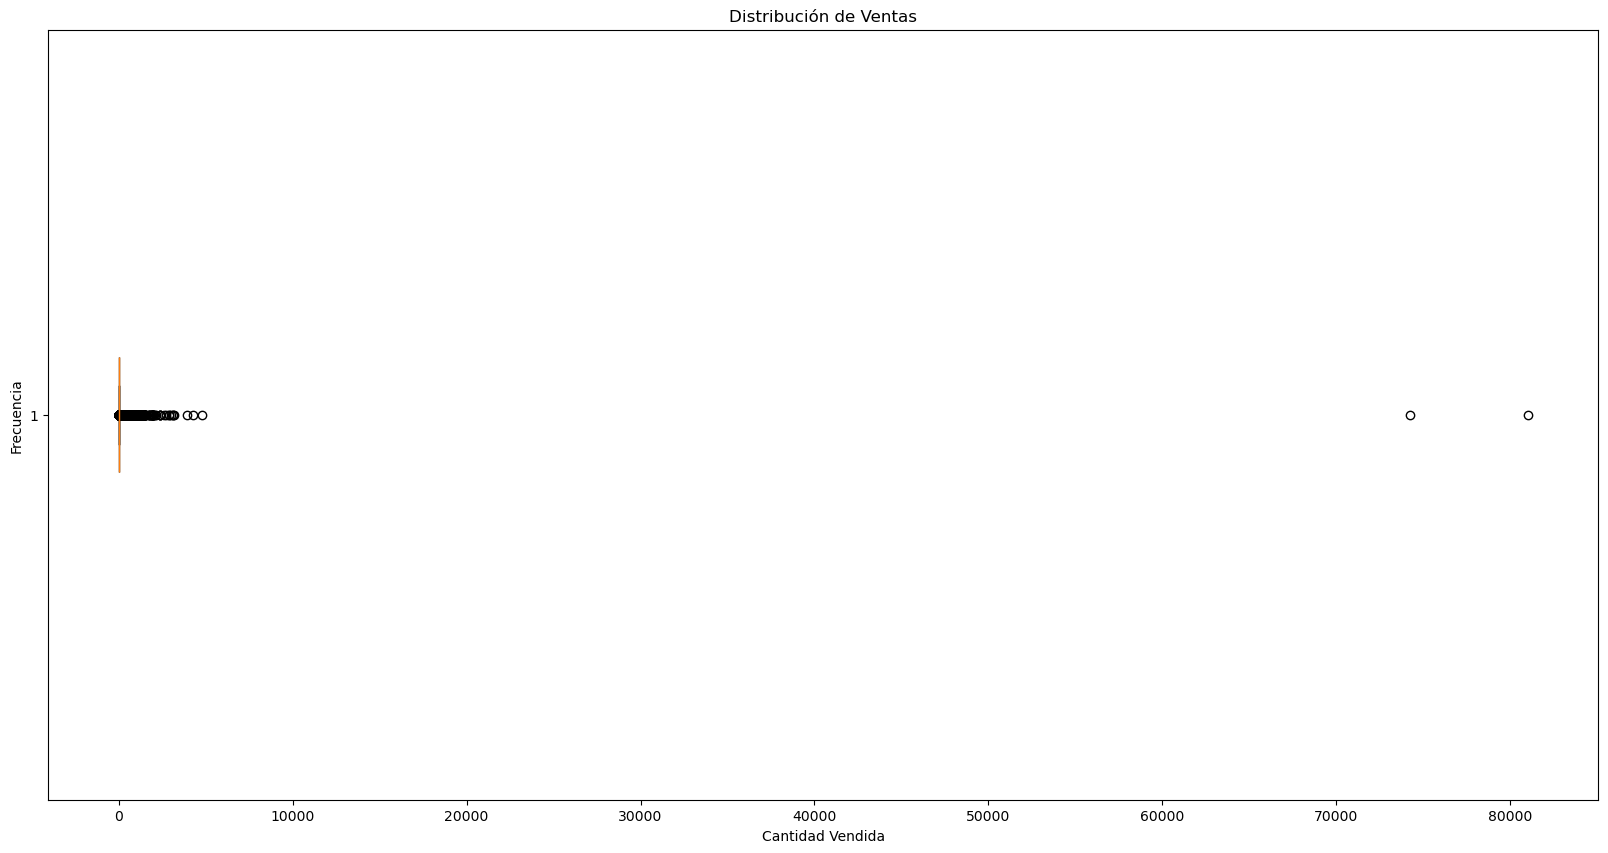

In [26]:
fig,ax = plt.subplots(figsize=(20,10))

ax.boxplot(ecommerce_data['cantidad'],vert=False,patch_artist=True)

ax.set_title('Distribución de Ventas')
ax.set_xlabel('Cantidad Vendida')
ax.set_ylabel('Frecuencia')

plt.show()

In [27]:
cantidad_extrema=ecommerce_data[ecommerce_data['cantidad']>8000]

cantidad_extrema

,id_factura,id_producto,descripcion,cantidad,precio_unitario,id_cliente,pais,monto,dia,mes,anio,horario
36521,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,12346.0,United Kingdom,77183.6,18,1,2011,10:01:00
392226,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,16446.0,United Kingdom,168469.6,9,12,2011,09:15:00


In [28]:
ecommerce_data = ecommerce_data.drop(ecommerce_data.index[[36521, 392226]]).reset_index(drop=True)


Text(0, 0.5, 'Frecuencia')

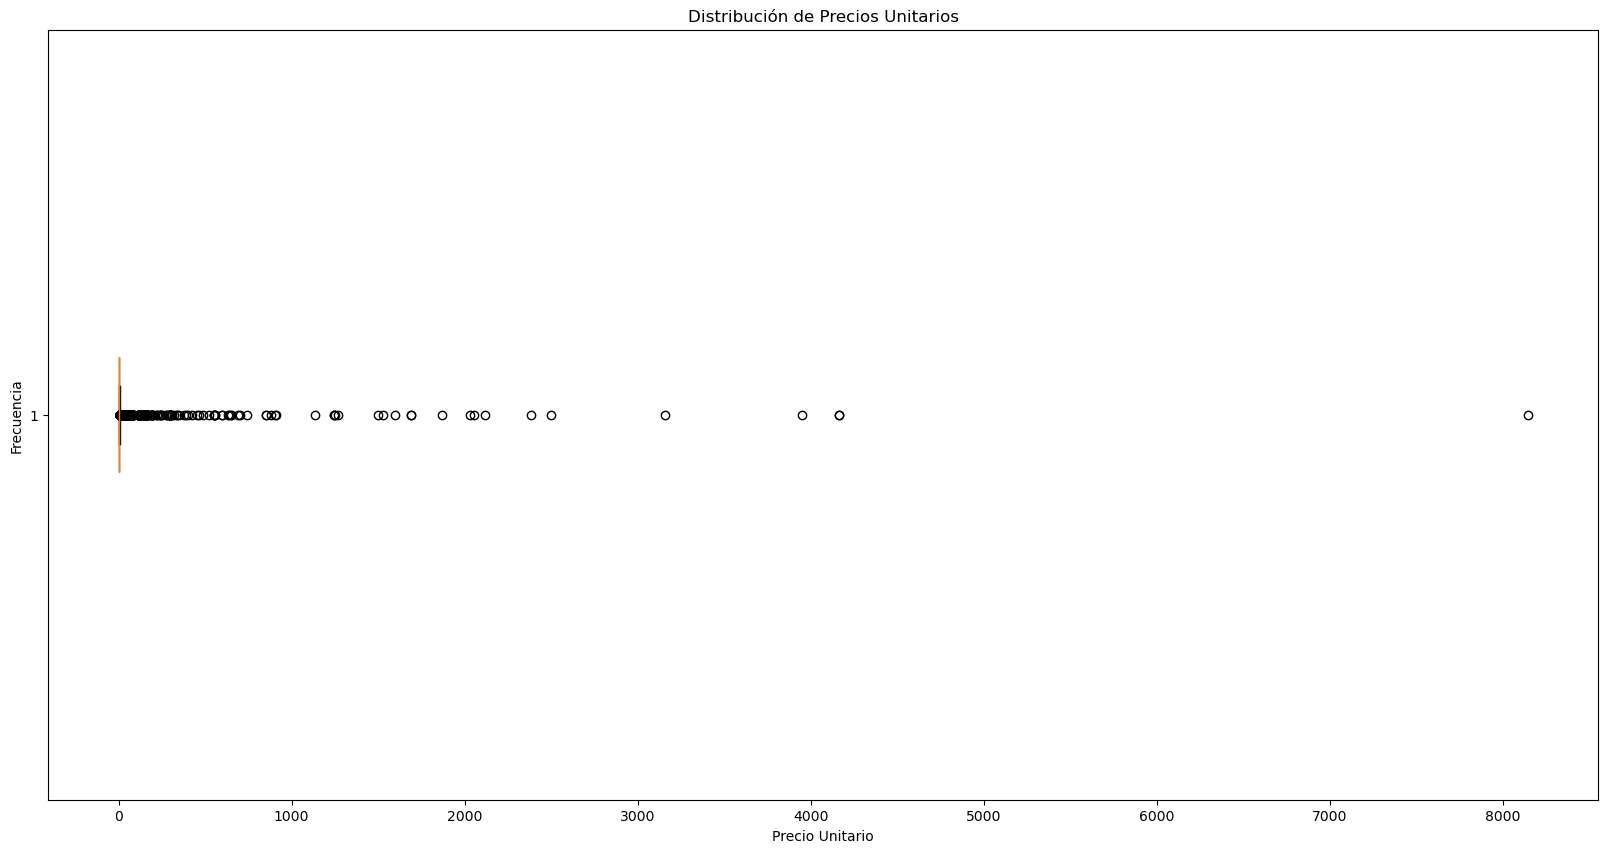

In [29]:
fig,ax = plt.subplots(figsize=(20,10))

ax.boxplot(ecommerce_data['precio_unitario'],vert=False,patch_artist=True)

ax.set_title('Distribución de Precios Unitarios')
ax.set_xlabel('Precio Unitario')
ax.set_ylabel('Frecuencia')


In [32]:
# exportar el dataframe limpiado
ecommerce_data.to_csv('../dataset/online_retail_clean.csv', index=False)
